In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mandelbrot(z,C,Nmax=50,Zlim=50):
    
    for i in range(Nmax):
        z = z**2 + C
        if abs(z) > Zlim:
            return i
    return Nmax

def mandelbrot_binary(z0,C,Nmax=50,Zlim=50):
    
    z = z0
    for i in range(Nmax):
        z = z**2 + C
        if abs(z) > Zlim:
            return 1
    
    return 0

def julia(z,C,Nmax=50,Zlim=50):
    
    for i in range(Nmax):
        z = z**2 + C
        if abs(z) > Zlim:
            return i
    return Nmax
        

In [41]:
C = np.arange(-4,2,0.001)
y = np.zeros(len(C))
for i in range(len(C)):
    Cval = C[i]
    y[i] = mandelbrot_binary(0,Cval)

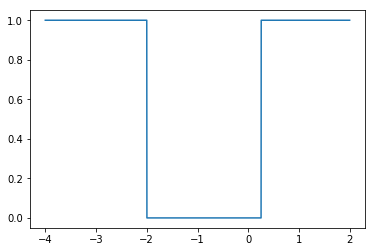

In [42]:
plt.plot(C,y)

In [46]:
npoints = 1001
x = np.linspace(-2.0,0.5,npoints)
y = np.linspace(-1.25,1.25,npoints)
A = np.zeros([npoints,npoints])

In [47]:
C = np.complex(-0.4,0.2)
z0 = 0
for i in range(len(x)):
    r_val = x[i]
    for j in range(len(y)):
        i_val = y[j]
        C = np.complex(r_val,i_val)
        A[i,j] = mandelbrot(z0,C,Nmax=50)
        

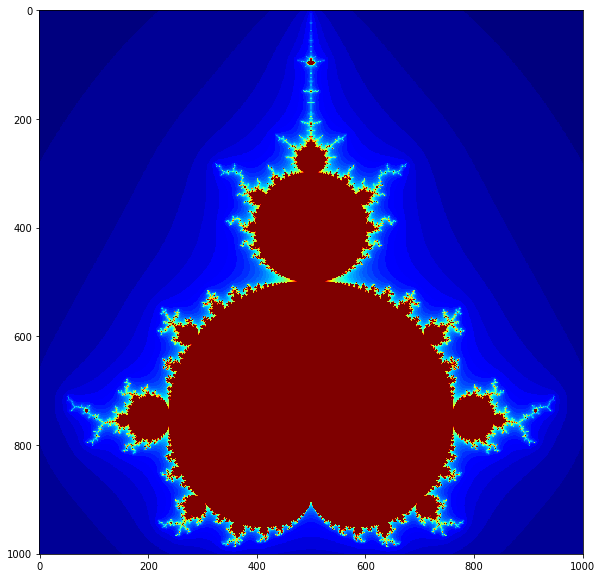

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(A,interpolation='nearest',cmap='jet')

### Faster mandelbrot set

In [49]:
x_real = np.linspace(-2.0,0.5,1001)
x_im = np.linspace(-1.25j,1.25j,1001)
xx,yy = np.meshgrid(x_real,x_im)
cc = xx + yy

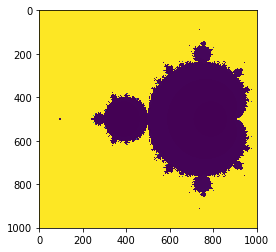

In [50]:
n = 50
Zlim = 50
zz = 0
for i in range(n):
    zz = zz**2 + cc
    zz[abs(zz)>Zlim]=i

#zz[abs(zz) > n] = n
plt.imshow(abs(zz))

#### Zoom in on the Mandelbrot set

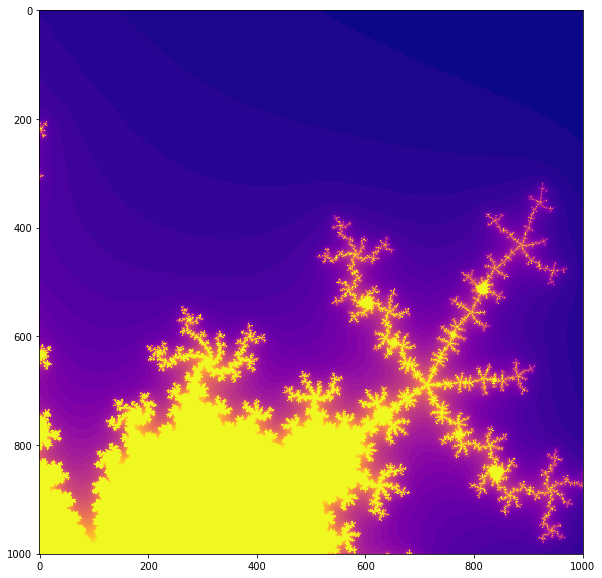

In [10]:
npoints = 1001
x = np.linspace(-0.7,-0.5,npoints)
y = np.linspace(0.5,0.7,npoints)
A = np.zeros([npoints,npoints])

C = np.complex(-0.4,0.2)
z0 = 0
for i in range(len(x)):
    r_val = x[i]
    for j in range(len(y)):
        i_val = y[j]
        C = np.complex(r_val,i_val)
        A[i,j] = mandelbrot(z0,C,Nmax=50)

plt.figure(figsize=(10,10))
plt.imshow(A,interpolation='nearest',cmap='plasma')

In [13]:
%matplotlib osx

In [29]:
C = np.complex(-0.4,0.2)
z0 = 0
for i in range(len(x)):
    r_val = x[i]
    for j in range(len(y)):
        i_val = y[j]
        C = np.complex(r_val,i_val)
        A[i,j] = mandelbrot(z0,C,Nmax=50)
        

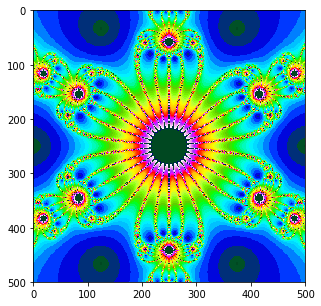

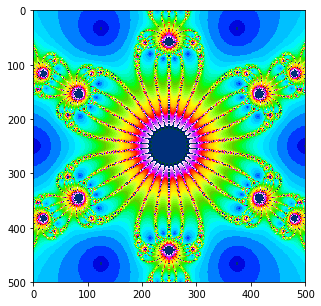

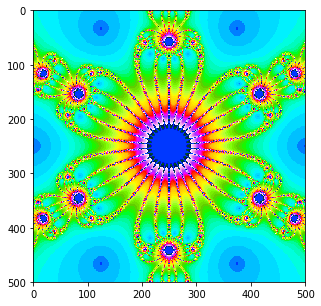

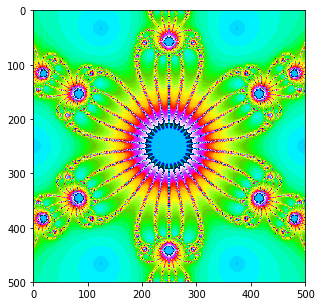

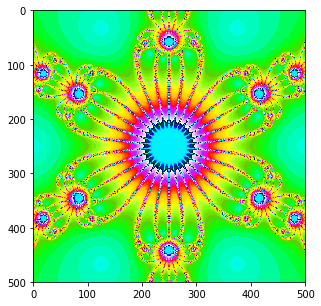

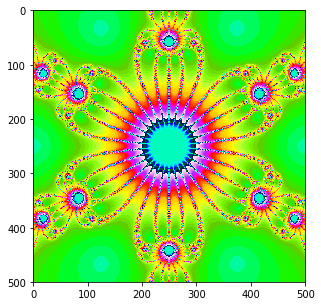

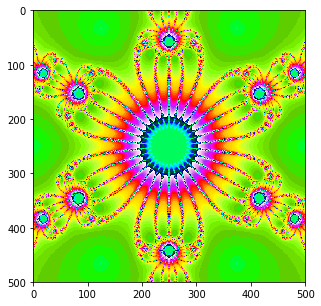

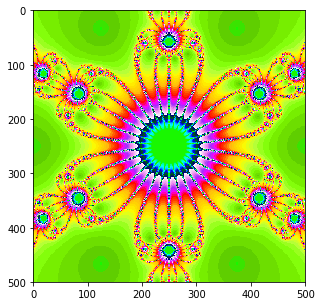

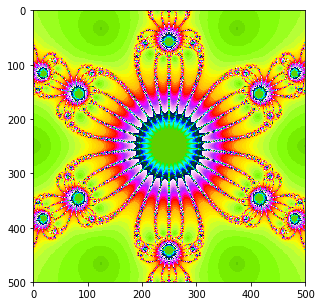

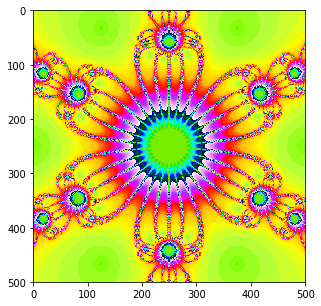

In [26]:
#One attempt at an animation
# On PCs try %matplotlib qt
plt.rcParams['figure.figsize'] = [5, 5]
from matplotlib import cm

min = A.min()
A -= min
max = A.max()
counter = 0
while (counter < 10):
    A = (A + 2) % max; 
    plt.imshow(A,cmap='gist_ncar', interpolation='nearest',animated=True)
    plt.show()
    plt.pause(0.2)
    counter += 1

### Generating the Julia set

In [6]:
#This is a neat way yo generate a movie of the Julia set

def julia(c, z, num=50):
    for i in range(num):
        z = z ** 2 + c
        if np.abs(z) > 50:
            return i
    return num

def get_julia(c, delta, **kwargs):
    num = kwargs['num'] if 'num' in kwargs else 500
    threshold = kwargs['threshold'] if 'threshold' in kwargs else 50
    center_x = kwargs['y'] if 'y' in kwargs else 0
    center_y = kwargs['x'] if 'x' in kwargs else 0    
    x = np.linspace(center_x - delta, center_x + delta, num)
    y = np.linspace(center_y - delta, center_y + delta, num)
    A = np.zeros((num, num))
    for i, i_x in enumerate(x):
        for j, j_y in enumerate(y):
            z = np.complex(i_x, j_y)
            A[i, j] = julia(c, z, threshold)
    return A

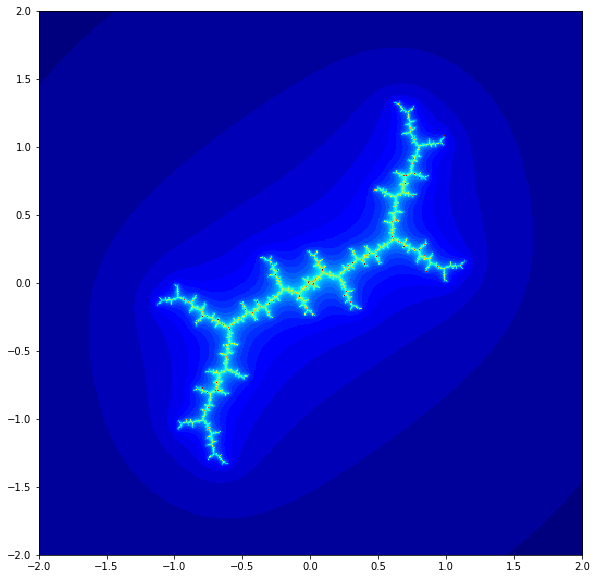

In [7]:
from IPython.display import HTML
import matplotlib.animation
plt.rcParams['animation.html'] = 'html5'

point = {'x': 0, 'y': 0}
fig = plt.figure(figsize=(10,10))
c = np.complex(0, 1)
im = plt.imshow(get_julia(c, 2), interpolation='nearest', cmap='jet', animated=True,extent=[-2,2,-2,2])

def update_fig(i):
    #make 100 values of c on complex plane
    x = np.sin(2 * np.pi * i / 100)
    y = np.cos(2 * np.pi * i / 100)
    c = np.complex(x, y)
    im.set_array(get_julia(c, 2, **point))
    return im,

anim = matplotlib.animation.FuncAnimation(fig, update_fig, frames=100, interval=20, blit=True)
HTML(anim.to_html5_video())

In [51]:
npoints = 500
x = np.linspace(-1,1,npoints)
y = np.linspace(-1,1,npoints)
A = np.zeros([npoints,npoints])

In [56]:
C0 = np.complex(-0.4,0.6)
for i in range(len(x)):
    r_val = x[i]
    for j in range(len(y)):
        i_val = y[j]
        z = np.complex(r_val,i_val)
        A[i,j] = julia(z,C0,Nmax=300,Zlim=10)

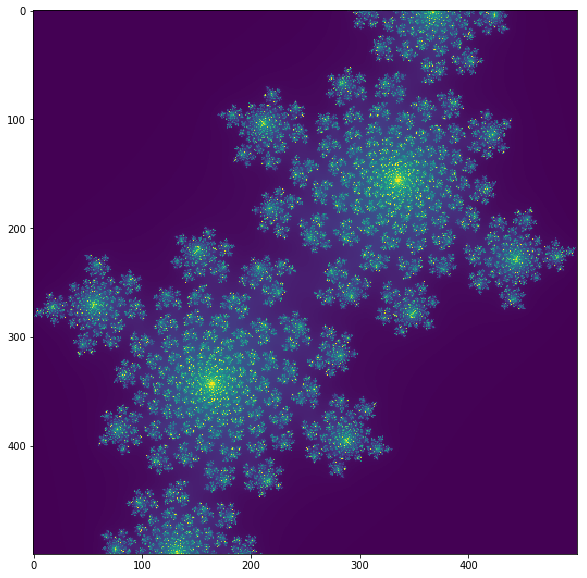

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(A)

### Newton's method fractal

$f(\alpha) = f(x_n) + f'(x_n)(\alpha - x_n) + R1$  

At the intercept $f(\alpha)$ = 0, so we can rearrange for $x_n$

In [13]:
def f(z):
    return z**6 +1 
def df_dz(z):
    return 6*z**5 

In [14]:
def newton(z,Nmax=50,Zlim=50,terminate=1e-3,):
    
    for i in range(Nmax):
        #if df_dz(z) != 0.0:
        z = z - f(z)/df_dz(z)
        if abs(f(z)) < terminate:
            return i
    return Nmax

def get_newton(delta, **kwargs):
    num = kwargs['num'] if 'num' in kwargs else 200
    threshold = kwargs['threshold'] if 'threshold' in kwargs else 50
    center_x = kwargs['y'] if 'y' in kwargs else 0
    center_y = kwargs['x'] if 'x' in kwargs else 0    
    x = np.linspace(center_x - delta, center_x + delta, num)
    y = np.linspace(center_y - delta, center_y + delta, num)
    A = np.zeros((num, num))
    for i, i_x in enumerate(x):
        for j, j_y in enumerate(y):
            z = np.complex(i_x, j_y)
            A[i, j] = newton(z)
    return A

In [15]:
npoints = 500
x = np.linspace(-1,1,npoints)
y = np.linspace(-1,1,npoints)
A = np.zeros([npoints,npoints])

In [16]:
for i in range(len(x)):
    r_val = x[i]
    for j in range(len(y)):
        i_val = y[j]
        z = np.complex(r_val,i_val)
        A[i,j] = newton(z,Nmax=50,Zlim=10)

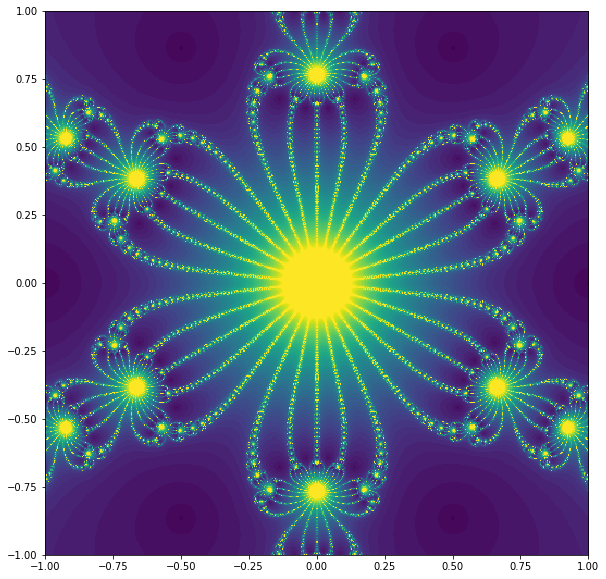

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(A,vmin=0, vmax=50,extent=(-1,1,-1,1))

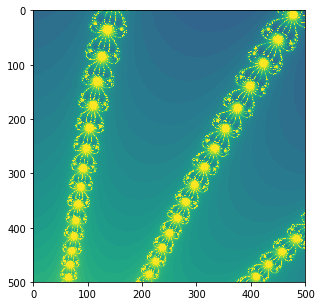

In [34]:
#range of zoom box dimensions for a zoom figure
nlevels = 100
z = np.logspace(np.log10(0.25),np.log10(0.001),num=nlevels)
#Center to zoom in on 
zoompoint = {'x': -0.24, 'y': -0.74, 'num':500}

def update_fig(i):
    im.set_array(get_newton(z[i], **zoompoint))
    return im,

fig = plt.figure()
im = plt.imshow(get_newton(z[0], **zoompoint), interpolation='nearest', animated=True)

anim = matplotlib.animation.FuncAnimation(fig, update_fig, frames=nlevels, interval=100, blit=True)
HTML(anim.to_html5_video())

In [12]:
z

array([1.        , 0.93260335, 0.869749  , 0.81113083, 0.75646333,
       0.70548023, 0.65793322, 0.61359073, 0.57223677, 0.53366992,
       0.49770236, 0.46415888, 0.43287613, 0.40370173, 0.37649358,
       0.35111917, 0.32745492, 0.30538555, 0.28480359, 0.26560878,
       0.24770764, 0.23101297, 0.21544347, 0.2009233 , 0.18738174,
       0.17475284, 0.16297508, 0.15199111, 0.14174742, 0.13219411,
       0.12328467, 0.1149757 , 0.10722672, 0.1       , 0.09326033,
       0.0869749 , 0.08111308, 0.07564633, 0.07054802, 0.06579332,
       0.06135907, 0.05722368, 0.05336699, 0.04977024, 0.04641589,
       0.04328761, 0.04037017, 0.03764936, 0.03511192, 0.03274549,
       0.03053856, 0.02848036, 0.02656088, 0.02477076, 0.0231013 ,
       0.02154435, 0.02009233, 0.01873817, 0.01747528, 0.01629751,
       0.01519911, 0.01417474, 0.01321941, 0.01232847, 0.01149757,
       0.01072267, 0.01      , 0.00932603, 0.00869749, 0.00811131,
       0.00756463, 0.0070548 , 0.00657933, 0.00613591, 0.00572

Recall how to find roots in the complex plane!